In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing imdb data
imdb_sent = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', '\t', header=None)
imdb_sent.columns = ['text', 'sentiment']
imdb_sent.head()

,text,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [3]:
#identifying initial percent positive and negative
sent_count = imdb_sent.sentiment.value_counts()
print('Total\nPercent Positive: {}\tPercent Negative: {}'.format(100*sent_count[0]/(imdb_sent.shape[0]), 100*sent_count[1]/(imdb_sent.shape[0]))) 

#splitting imdb data into train and test groups - 75%/25%
np.random.seed(222)
imdb_train = imdb_sent.sample(frac=0.75, replace=False)
imdb_test = imdb_sent.sample(frac=0.25, replace=False)

#identifying train and test percent positive and negative
sent_count_train = imdb_train.sentiment.value_counts()
print('Train\nPercent Positive: {}\tPercent Negative: {}'.format(100*sent_count_train[0]/(imdb_train.shape[0]), 100*sent_count_train[1]/(imdb_train.shape[0]))) 

sent_count_test = imdb_test.sentiment.value_counts()
print('Test\nPercent Positive: {}\tPercent Negative: {}'.format(100*sent_count_test[0]/(imdb_test.shape[0]), 100*sent_count_test[1]/(imdb_test.shape[0]))) 


Total
Percent Positive: 48.39572192513369	Percent Negative: 51.60427807486631
Train
Percent Positive: 47.05882352941177	Percent Negative: 52.94117647058823
Test
Percent Positive: 49.73262032085562	Percent Negative: 50.26737967914438


In [4]:
#identifying key words for bad reviews
keywords = ['worst', 'slow', 'boring', 'bored', 
            'bad', 'awful', 'terrible', 'negative', 'walked out', 
            'long', 'predictable', 'avoid', 'hard to watch', 'annoy', 'hate', 
            'stink', 'stunk', 'trash', 'unhappy', 'upset']

#creating columns to identify if keyword in review for test and train 
for key in keywords:
    imdb_train[str(key)] = imdb_train.text.str.contains(
        str(key), 
        case=False
    )

for key in keywords:
    imdb_test[str(key)] = imdb_test.text.str.contains(
        str(key), 
        case=False
    )

__Feature Engineering and Selection Process:__
In selecting these keywords as features in this model, I first brainstormed whatever words I could think of that could describe the latest bad movies I'd seen.  This yielded only a 50% correct labeling.  I then turned to google to identify more words that would describe bad movies.  I chose ones that I had seen in bad movie reviews in the past. 

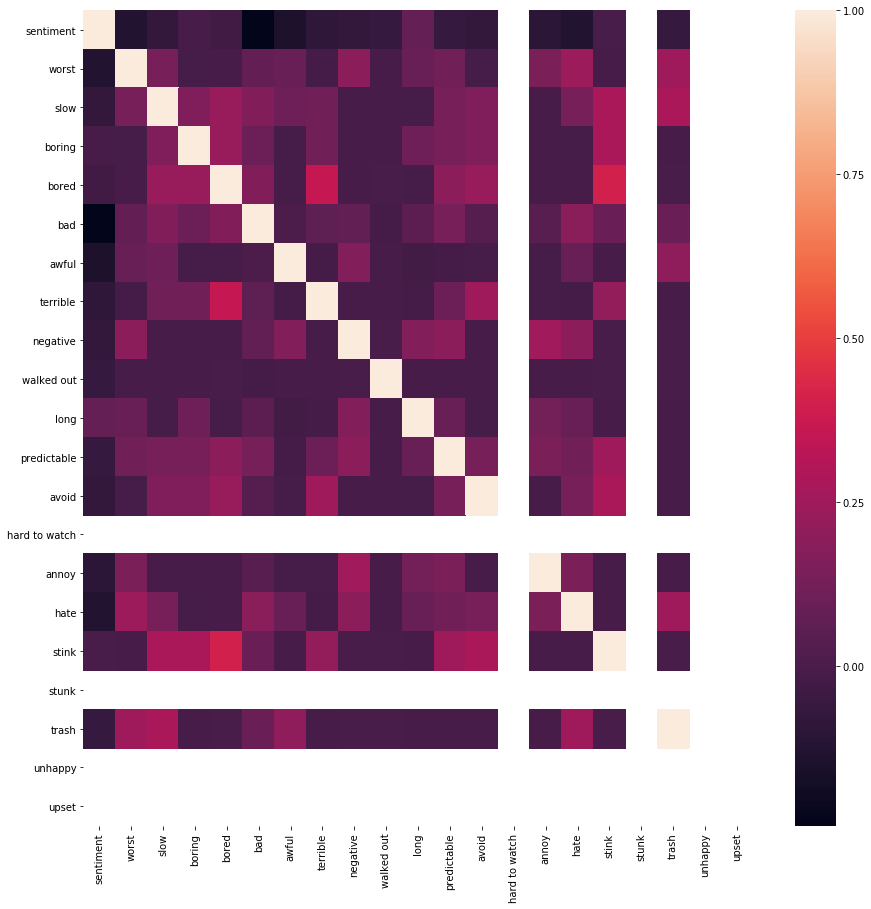

In [5]:
#plotting heatmap to ensure independence
plt.figure(figsize=(15, 15))
sns.heatmap(imdb_train.corr())

In [6]:
#identifying x and y values for train and test
data_train = imdb_train[keywords]
target_train = imdb_train['sentiment']

data_test = imdb_test[keywords]
target_test = imdb_test['sentiment']

In [7]:
from sklearn.naive_bayes import BernoulliNB

#initializing NB
bnb = BernoulliNB()
#training model 
bnb.fit(data_train, target_train)
#classifying test data
y_pred_test = bnb.predict(data_test)

print('Number of mislabeled points out of a total {} points: {}'.format(
     data_test.shape[0],
     (target_test != y_pred_test).sum()
))
#percent mislabeled
print('Percent of Test Mislabeled: ', (100 * ((target_test != y_pred_test).sum()) /data_test.shape[0]), '%')

Number of mislabeled points out of a total 187 points: 65
Percent of Test Mislabeled:  34.75935828877005 %


In [8]:
#Repeating process for Yelp Data
yelp_sent = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', '\t', header=None)
yelp_sent.columns = ['text', 'sentiment']

for key in keywords:
    yelp_sent[str(key)] = yelp_sent.text.str.contains(
        str(key), 
        case=False
    )
    
yelp_data = yelp_sent[keywords]
yelp_target = yelp_sent['sentiment']

In [9]:
y_pred_yelp = bnb.predict(yelp_data)

print('Number of mislabeled points out of a total {} points: {}'.format(
    yelp_data.shape[0], 
    (yelp_target != y_pred_yelp).sum()
))
print('Percent of Yelp Mislabeled: ', (100 * ((yelp_target != y_pred_yelp).sum()) /yelp_data.shape[0]), '%')

Number of mislabeled points out of a total 1000 points: 439
Percent of Yelp Mislabeled:  43.9 %


In [10]:
#Repeating with Amazon data
amazon_sent = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', '\t', header=None)
amazon_sent.columns = ['text', 'sentiment']

for key in keywords:
    amazon_sent[str(key)] = amazon_sent.text.str.contains(
        str(key), 
        case=False
    )
    
amazon_data = amazon_sent[keywords]
amazon_target = amazon_sent['sentiment']

In [11]:
y_pred_amazon = bnb.predict(amazon_data)

print('Number of mislabeled points out of a total {} points: {}'.format(
    amazon_data.shape[0], 
    (amazon_target != y_pred_amazon).sum()
))
print('Percent of Amazon Mislabeled: ', (100 * ((amazon_target != y_pred_amazon).sum()) /amazon_data.shape[0]), '%')

Number of mislabeled points out of a total 1000 points: 451
Percent of Amazon Mislabeled:  45.1 %


The features used in this model were 10% less accurate at predicting the sentiment for data that was translated from other contexts. 